<a href="https://colab.research.google.com/github/pabhijeet99/DS_Python_files/blob/main/Clustering_Eastwest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Hierarchical Clustering

In [7]:
data = pd.read_csv("/content/EastWest.csv")
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [8]:
# Normalization function 
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [9]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,1:])
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


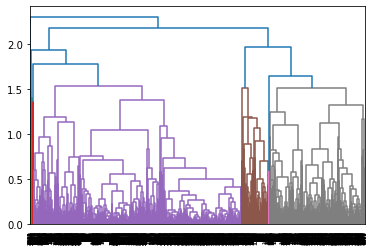

In [5]:
# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [10]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [11]:
# Save Clusters for chart
y_hc = hc.fit_predict(data_norm)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [12]:
data1 = pd.concat([data, Clusters], axis=1)
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
data1.iloc[:,0:12].groupby(data1.Clusters).mean()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


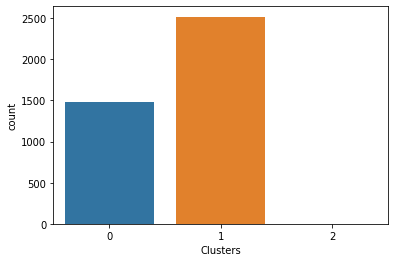

In [14]:
sns.countplot(data1["Clusters"])

## DBSCAN clustering:

In [15]:
array = data.iloc[:,1:]
array

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [18]:
DBSCAN(eps=0.8, min_samples=6)

DBSCAN(eps=0.8, min_samples=6)

In [19]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [21]:
data2 = pd.concat([data,cl], axis=1)
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
data2.iloc[:, 1:12].groupby(data2.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878
0,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000
1,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000
2,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000
3,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


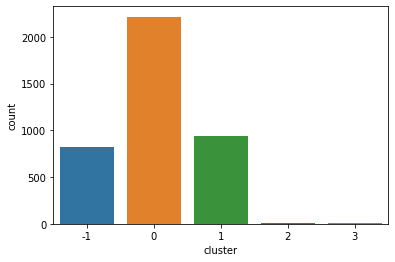

In [23]:
sns.countplot(data2['cluster'])

## k-means clustering

In [24]:
from sklearn.cluster import KMeans

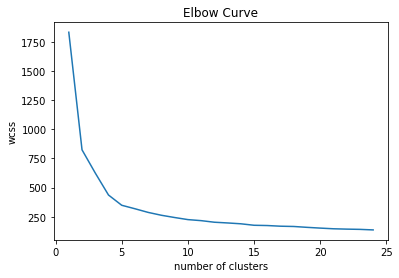

In [25]:
#Elbow curve
wcss = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('Elbow Curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
model = KMeans(n_clusters=6)
model.fit(data_norm)
model.labels_

array([0, 0, 0, ..., 2, 4, 4], dtype=int32)

In [27]:
cd = pd.Series(model.labels_)
data['clust'] = cd
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [28]:
data.iloc[:,1:12].groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
1,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
2,69355.197889,165.506596,3.546174,1.000000,1.013193,33302.804749,18.844327,570.437995,1.725594,3300.385224,1.0
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
5,142738.529138,227.340326,4.242424,1.002331,1.037296,56482.144522,21.400932,840.319347,2.510490,6244.319347,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


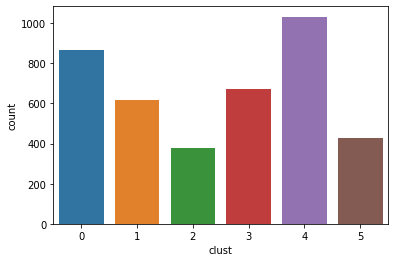

In [29]:
sns.countplot(data["clust"])

# Inference:
we can conclude that DBSCAN is best clustering method for obtaining clusters.